<img style="float: center; width: 100%" src="https://raw.githubusercontent.com/andrejkk/TalksImgs/master/FrontSlideUpperBan.png">
<p style="margin-bottom:2cm;"></p>

<center>
    <H1> 10. Time series and ICT traffic models </H1>
   


<br><br>
    <H3> Andrej Košir, Lucami, FE </H4>
    
    <H4> Kontakt: prof. dr. Andrej Košir, andrej.kosir@lucami.fe.uni-lj.si, skype=akosir_sid </H4>
</center>



<p style="margin-bottom:2cm;"></p>
<div style="width:100%;text-align:right;font-weight:bold;font-size:1.2em;"> 1 </div>
<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

## ■ Content, goal

- Goals
    - Basics of TC traffic modeling
    - Time series analysis and fitting
    - Getting familiar with time series in terms of what it offers


- On random nature of the traffic: Poisson traffic, self-similarity
- Traffic modeling using time series
- Four roles of time series


<p style="margin-bottom:2cm;"></p>
<div style="width:100%;text-align:right;font-weight:bold;font-size:1.2em;"> 2 </div>
<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

## ■ Sections (1) 


10.1. Traffic model basics

■ Poisson model and internet traffic $\large{*}$

■ Self similar traffic and Hurst parameter

■ Example: aggregated network traffic

10.2. Time series: description, basic characteristics

■ Time series definition and use $\large{*}$

■ Autocorrelation function, differentiating, aggregation $\large{*}$

■ Weak stationarity of time series $\large{*}$

■ Four time series analysis 



<p style="margin-bottom:2cm;"></p>
<div style="width:100%;text-align:right;font-weight:bold;font-size:1.2em;"> 3 </div>
<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

## ■ Sections (2)

10.3. Time series models

■ Time series models $\large{*}$

■ Data fitting procedure

■ Data fitting (1): Determining and removing trends $\large{*}$

■ Data fitting (2): Determining seasons $\large{*}$

■ Data fitting (3): Hurst parameter $\large{*}$

■ Data fitting (4): AR part of the model $\large{*}$

■ Data fitting (5): MA part of the model $\large{*}$

■ Predicting / estimating time series $\large{*}$


<p style="margin-bottom:2cm;"></p>
<div style="width:100%;text-align:right;font-weight:bold;font-size:1.2em;"> 4 </div>
<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

## 10.1. Traffic model basics

■ Poissonov model in internetni promet

■ Samopodoben promet in Hurstov parameter

■ Primer: agregiran omrežni promet



<p style="margin-bottom:2cm;"></p>
<div style="width:100%;text-align:right;font-weight:bold;font-size:1.2em;"> 5 </div>
<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

## ■ Poisson traffic model and internet traffic


- Poisson model: the distribution of number of units per time interval
$$ p_k(n)={n\choose k} p^k(1-p)^{n-k} \quad \underset{n\to\infty}{\longrightarrow} \quad P[X=k; \lambda] = \frac{\lambda^k}{k!} e^{-\lambda} $$
where $\lambda$ is an average number of units per time interval


- The distribution of their arrival times is exponential:
$$ p(t; \lambda) = \left\{\matrix{\lambda e^{-\lambda t}, & t \geq 0 \cr
0, \hfill & t < 0.}\right. $$


- TC network may not be Poisson but self-similar. Described by Hurst (parameter) exponent





<p style="margin-bottom:2cm;"></p>
<div style="width:100%;text-align:right;font-weight:bold;font-size:1.2em;"> 6 </div>
<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

## ■ Self similar traffic and Hurst parameter

- Hurst (parameter) exponent
- definition later.


<img style="float: right; width: 300px; margin: 0px 20px 20px 0px;" src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/SelfSimilarTr_slo.png">



<p style="margin-bottom:12cm;"></p>
<div style="width:100%;text-align:right;font-weight:bold;font-size:1.2em;"> 7 </div>
<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

## ■ Case 10.1 to develop theory: aggregated network traffic


- Aggregated network traffic: 
- For the analysis: we further aggregate it by $m=30$, see Python graphs bellow


<p style="margin-bottom:2cm;"></p>
<div style="width:100%;text-align:right;font-weight:bold;font-size:1.2em;"> 8 </div>
<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

In [4]:
# Load libraries
import pandas as pd
import numpy as np
#%matplotlib notebook
import matplotlib.pylab as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf  
import warnings
warnings.filterwarnings('ignore')



## Definitions of selected functions

# Test stationarity
def test_stationarity(timeseries, figsizeIn):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean() # rolling_mean(timeseries, window=12)
    rolstd = timeseries.rolling(window=12).std() #pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    plt.figure(figsize=figsizeIn)
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')    
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
    
# Estimate hurst parameter
def hurst(ts):
    """Returns the Hurst Exponent of the time series vector ts"""
    
    # Create the range of lag values
    lags = range(2, 100)
 
    # Calculate the array of the variances of the lagged differences
    tau = [np.sqrt(np.std(np.subtract(ts[lag:], ts[:-lag]))) for lag in lags]
 
    # Use a linear fit to estimate the Hurst Exponent
    poly = np.polyfit(np.log(lags), np.log(tau), 1)
 
    # Return the Hurst exponent from the polyfit output
    return poly[0]*2.0    
    
    

# Compute fractional differnce
#x = np.array([1,2,3,4,5,6,7,8,9,10])
#d = 0.3
#dfx = fractionalDiff(x,d)
#print (dfx)
def fractionalDiff(x, d):
    """Returns fractionally differentiated time series """
    
    # Get coefficients
    N = len(x)
    c = np.zeros(N)
    j = 1.0
    c[0] = 1
    for i in range(1,N):
        c[i] = c[i-1]*((j-d-1)/j)
        j += 1.0
        
    c = c[::-1] # Reverse them
    
    dfx = np.zeros(N);
    for k in range(N):
        dfx[k] = np.dot(c[N-k-1:N], x[0:k+1])
    
    return dfx


# Compute inverse fractional differnce
#x = np.array([1,2,3,4,5,6,7,8,9,10])
#d = 0.3
#dfx = fractionalDiff(x,d)
#print (dfx)
def fractionalInvDiff(x, d):
    """ Returns fractionally differentiated time series """


    # Get coefficients
    N = len(x)
    aa = np.zeros(N)
    aa[0] = 1.0
    for n in range(1,N):
        aa_c = 0.0
        for k in range(1,n+1):
            pp = 1.0*d
            for a in range(1,k):
                pp *= (d-a)/(a+1.0)
            aa_c += aa[n-k]*((-1)**(k-1))*pp
            #aa_c += aa[n-k-1]*((-1)**(k-1))*sc.special.binom(d,k)
        aa[n] = aa_c    
        
    
    aa = aa[::-1] # Reverse them
    #print '\n Inv aa = ', aa
    
    idfx = np.zeros(N);
    for k in range(N):
        idfx[k] = np.dot(aa[N-k-1:N], x[0:k+1])
    
    return idfx


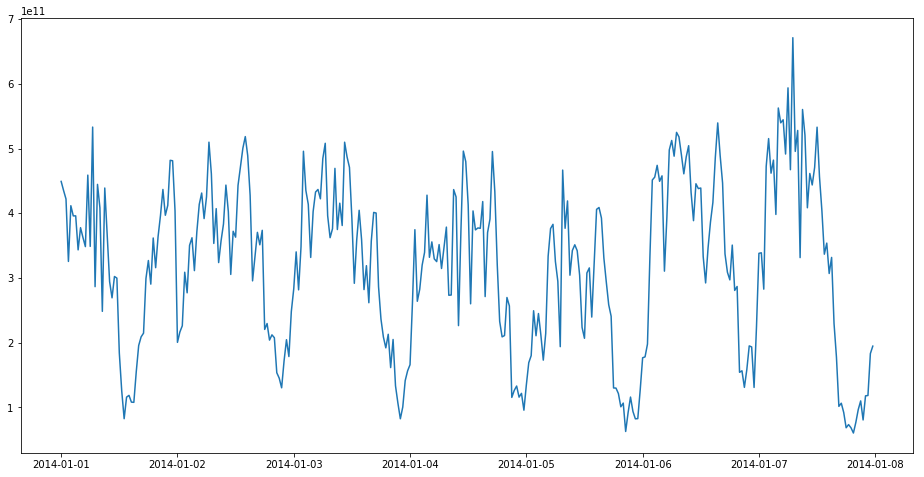

In [5]:
# Load data and agregate it 
# Settings
data_path = 'https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/'
file_name = 'trafficIn_All_h.csv'
full_file_name = data_path + file_name
figsizeInA = (16,8)
figsizeInB = (16,8)

# Load data
ts_r = pd.read_csv(full_file_name, delimiter=';')
ts_f = ts_r['traffic'].astype(float)


casi = pd.date_range(start='01/01/2014', end='01/08/2014', freq="T") # T = 1min
ts1 = ts_f.reset_index()
ts1["index"] = casi[:10052]
ts1.set_index("index", inplace=True)
ts_orig = ts1.iloc[:, 0]


# Aggregate it
m = 30
ts = ts_orig.resample('30T').mean()


#print (ts)

# Plot it
plt.figure(figsize=figsizeInA)
plt.plot(ts)
plt.show()


## 10.2. Time series: description, basic characteristics


■ Time series definition and use

■ Autocorrelation function, differentiating, aggregation

■ Weak stationarity of time series

■ Four time series analysis



<p style="margin-bottom:2cm;"></p>
<div style="width:100%;text-align:right;font-weight:bold;font-size:1.2em;"> 9 </div>
<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

## ■ Time series definition and use


- Time series is a random process indexed by time
$$ X_1, X_2, X_3, \ldots, X_n, \ldots $$
 where for each $n$
$$ X_n : {\cal G} \to ℝ $$  



- Using time series we model and analyze
    - Aggregated TC traffic;
    - Parameters of TC systems like queues etc. 
    - User modelling
    - Physiological measurements ...


- Analysis includes:
    - Finding trends, seasons (cycles) etc
    - Forecasting
    - Network architecture design 


<p style="margin-bottom:2cm;"></p>
<div style="width:100%;text-align:right;font-weight:bold;font-size:1.2em;"> 10 </div>
<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

## ■ Autocorrelation function, differentiation, aggregation


- What is correlation:
    - Equation: 
    $$ r(X,Y) = \frac{E((X-\bar{X})(Y-\bar{Y}))}{\sigma_X \sigma_Y}
     = \frac{Cov(X,Y)}{\sigma_X \sigma_Y} 
     \leftarrow \frac{\sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})}{\sigma_X \sigma_Y} $$
    - Measures linear part of the dependence


- Covariance function
    - Equation: 
    $$ \rho_X(n) = \frac{Cov(X_k, X_{k+n})}{\sigma_X^2} $$


- (Partial) auto covariance function


- Differences of time series
 $$ D X_k = X_k - X_{k-1} $$
 $$ D^d X_k = D D^{k+1} X_k $$


- Time series / traffic aggregation: level 𝑚 aggregation
$$ X_k^{(m)} = \frac{1}{m} \sum_{i=(k-1)m+1}^{km} X_i, \quad k=1,2,\ldots $$



<p style="margin-bottom:2cm;"></p>
<div style="width:100%;text-align:right;font-weight:bold;font-size:1.2em;"> 11 </div>
<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

## ■ Autocorrelation function, differentiation, aggregation


- Example of autocorrelation - see bellow



<p style="margin-bottom:2cm;"></p>
<div style="width:100%;text-align:right;font-weight:bold;font-size:1.2em;"> 12 </div>
<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

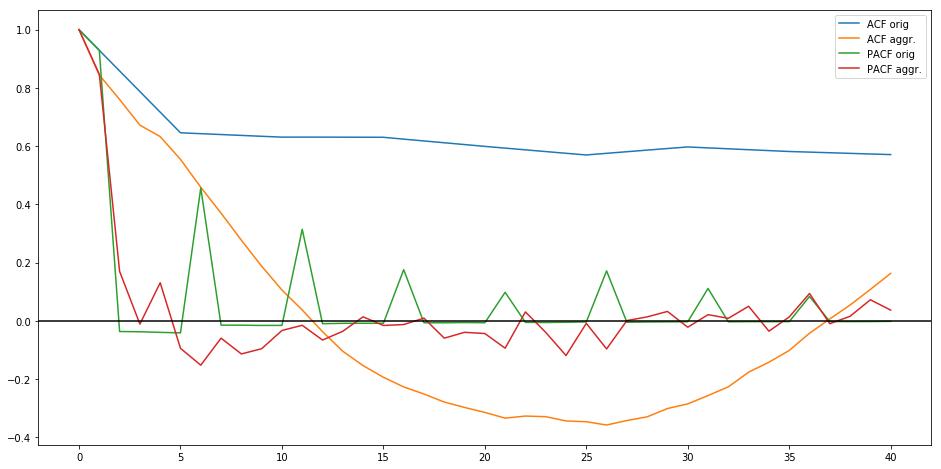

In [3]:
ts_acf = acf(ts)
ts_orig_acf = acf(ts_orig)
ts_pacf = pacf(ts)
ts_orig_pacf = pacf(ts_orig)

plt.figure(figsize=figsizeInA)
plt.plot(ts_orig_acf, label='ACF orig')
plt.plot(ts_acf, label='ACF aggr.')
plt.plot(ts_orig_pacf, label='PACF orig')
plt.plot(ts_pacf, label='PACF aggr.')
plt.axhline(y=0, color='k')
plt.legend()

plt.show()

# Why not OK? Data is not preprocessed - seasons are not removed! 

## ■ Weak stationarity of time series


- Stationarity depends on a selected moment:
    - According to mean: 
    $$ \sigma_X^2 < \infty, \quad E(X_k) = \mbox{konst} $$
    - According to variance: 
    $$ \sigma_X^2 < \infty, \quad Var(X_k) = \mbox{konst} $$
    


    

<p style="margin-bottom:2cm;"></p>
<div style="width:100%;text-align:right;font-weight:bold;font-size:1.2em;"> 13 </div>
<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

## ■ Four time series analysis


- Prior to analysis:
    - Select the model (AR, MA, etc)
    - Fitting to real data


- Four analysis
    1. Decomposition
    2. Forecasting
    3. Clustering
    4. Classification



<p style="margin-bottom:2cm;"></p>
<div style="width:100%;text-align:right;font-weight:bold;font-size:1.2em;"> 14 </div>
<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

## 10.3. Time series models


■ Time series models

■ Data fitting procedure

■ Data fitting (1): Determining and removing trends

■ Data fitting (2): Determining seasons

■ Data fitting (3): Hurst parameter

■ Data fitting (4): AR part of the model

■ Data fitting (5): MA part of the model

■ Predicting / estimating time series


<p style="margin-bottom:2cm;"></p>
<div style="width:100%;text-align:right;font-weight:bold;font-size:1.2em;"> 15 </div>
<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

## ■ Time series models (1)



- Autoregressive model, AR: AR(p)
    - Next variable is a linear combination of previous ones + noise
  $$ X_k = a_0 + \sum_{i=1}^p a_i X_{k-i} + \varepsilon_k, \quad k=1, \ldots $$
    - Model order $p$ and parameters $a_0, a_1, \ldots, a_p$, estimated by fitting to real data.
    - Noise $\varepsilon_k$ is a white noise.
    - Fitting criteria: least square error LSE and Yule-Walker equations


- Moving average model, MA: MA(q)
    - Next variable is filtered white noise, $\varepsilon_k$ is white noise.
 $$ X_k = b_0 + \sum_{i=1}^q b_i \varepsilon_{k-i} + \varepsilon_k, \quad k=1, \ldots $$   
    - Model order $q$ and parameters $b_0, b_1, \ldots, b_p$, estimated by fitting to real data.



<p style="margin-bottom:2cm;"></p>
<div style="width:100%;text-align:right;font-weight:bold;font-size:1.2em;"> 16 </div>
<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

## ■ Time series models (2)


- ARMA(p, q) = AR(p) + MA(q):
    - Combination of models
 $$ X_k = c_0 + \sum_{i=1}^p a_i X_{k-i} + \sum_{i=1}^q b_i \varepsilon_{k-i} + \varepsilon_k, \quad k=1, \ldots $$    
    - Model orders are determined by fitting to real data
    


- ARIMA(p, d, q) = ARMA(p, q) + I(d):
    - ARMA model assumes stationarity: 𝐸(𝑋_𝑘 )=𝑐. If not true, we differentiate data and model differences:
    $$ D X_k = X_k - X_{k-1} $$
    - Differentiation usually removes trend. In practice it is enough 𝑑=1 or 𝑑=2.



<p style="margin-bottom:2cm;"></p>
<div style="width:100%;text-align:right;font-weight:bold;font-size:1.2em;"> 17 </div>
<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

## ■ Time series models (3)

- Model FARIMA (Fractional ARIMA)
    - With self-similar traffic ARIMA model does not perform well. Theory says we need to differentiate for non-integer exponent:
  $$ d = H - 0.5 $$
  
 
- After differentiation we use ARMA(p, q) model on 
  $$ Y_k = D^d X_k $$



<p style="margin-bottom:2cm;"></p>
<div style="width:100%;text-align:right;font-weight:bold;font-size:1.2em;"> 18 </div>
<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

## ■ Data fitting procedure - summary


- Steps of the fitting procedure FARIMA(p, d, q):
    1. Determining / removing trends
    2. Determining / removing seasons 
    3. Determining self - similarity: estimate Hurst parameter $H$ and $d=H-0.5$
    4. Differenting traffic $Y_k = D^k X_k$
    5. Fitting ARMA(p, q) model to 𝑌_𝑘
        1. Determining $p$ and $q$: 
            1. For $p$: analyze partial autocorrelation function
            2. For $q$: analyze autocorrelation function
        2. Determining coefficients $a_i$ iand $b_j$: 
            1. Least mean square (LMS) typically, or 
            2. Maximum likelihood estimation (MLE).
            
            
- Case: TC network traffic modeling 



<p style="margin-bottom:2cm;"></p>
<div style="width:100%;text-align:right;font-weight:bold;font-size:1.2em;"> 19 </div>
<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

## ■ Data fitting (1): Determining and removing trends

- Determining trend: 
    - Subtracting mean $E(X_k)$
    - Subtracting best fitted line


- Case: results: see Python

<!-- <img style="float: right; width: 300px; margin: 0px 20px 20px 0px;" src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/TimeSer_TSTrafficNoTrend.png"> -->


<p style="margin-bottom:8cm;"></p>
<div style="width:100%;text-align:right;font-weight:bold;font-size:1.2em;"> 20 </div>
<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

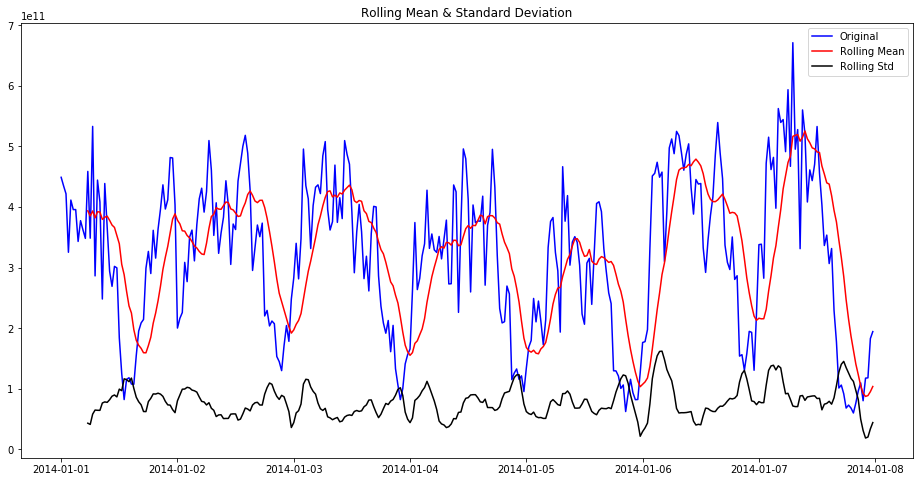

Results of Dickey-Fuller Test:
Test Statistic                  -4.984951
p-value                          0.000024
#Lags Used                       8.000000
Number of Observations Used    327.000000
Critical Value (1%)             -3.450507
Critical Value (5%)             -2.870420
Critical Value (10%)            -2.571501
dtype: float64


In [4]:
# Test weak stationarity according to the mean of Case 10.1

test_stationarity(ts, figsizeInA)

# Since statistics -4.984951 is lower than critical value @1% which is -3.450507, our time series is 
#   weak stationarity according to the mean 

## ■ Data fitting (2): Determining seasons

- Determine period $T$ from 
    - Apriori knowledge
    - Fourier analysis – spectrum
    - Manually 


- Case: Removing season:
    - Period 𝑇=1440;
    - Subtracting cyclical part


- Case: results see python



<!-- <img style="float: right; width: 300px; margin: 0px 20px 20px 0px;" src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/TimeSer_TSTrafficNoSeason.png"> -->


<p style="margin-bottom:2cm;"></p>
<div style="width:100%;text-align:right;font-weight:bold;font-size:1.2em;"> 21 </div>
<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

testing log - shifted log


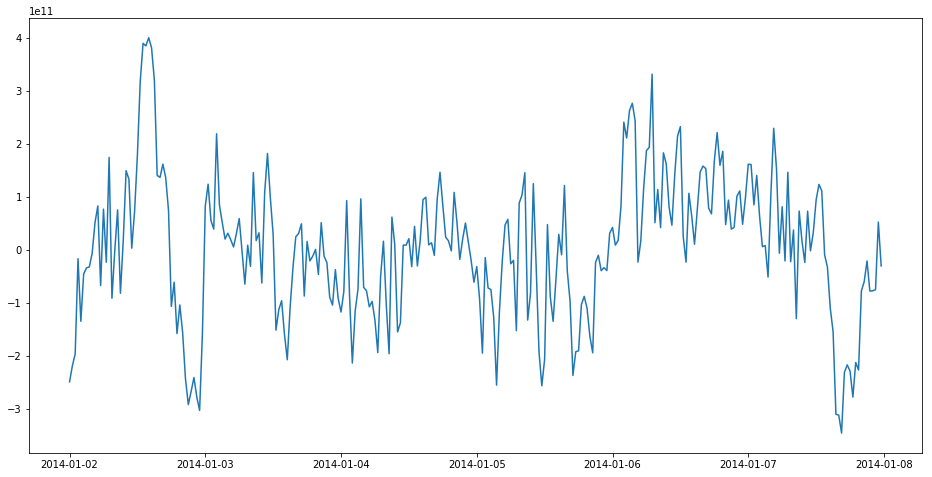

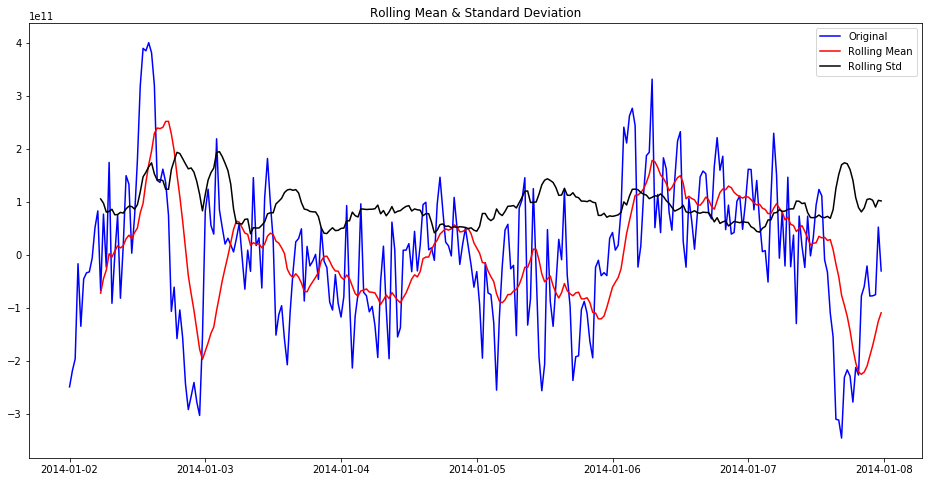

Results of Dickey-Fuller Test:
Test Statistic                  -4.323508
p-value                          0.000404
#Lags Used                       5.000000
Number of Observations Used    282.000000
Critical Value (1%)             -3.453754
Critical Value (5%)             -2.871844
Critical Value (10%)            -2.572261
dtype: float64


In [5]:
per = int(60*24/m)
ts_diff = ts - ts.shift(per) # Za več damo parameter: ts_log - ts_log.shift(12)


plt.figure(figsize=figsizeInA)
plt.plot(ts_diff)

ts_diff.dropna(inplace=True)
print ("testing log - shifted log")


test_stationarity(ts_diff, figsizeInA)
# Again we see it is still stationary


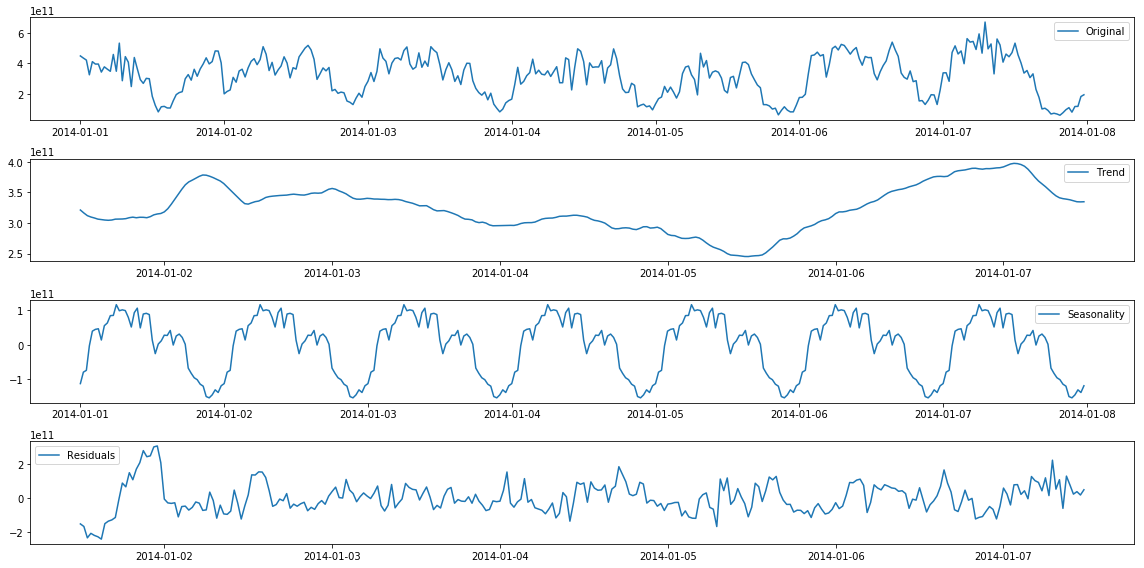

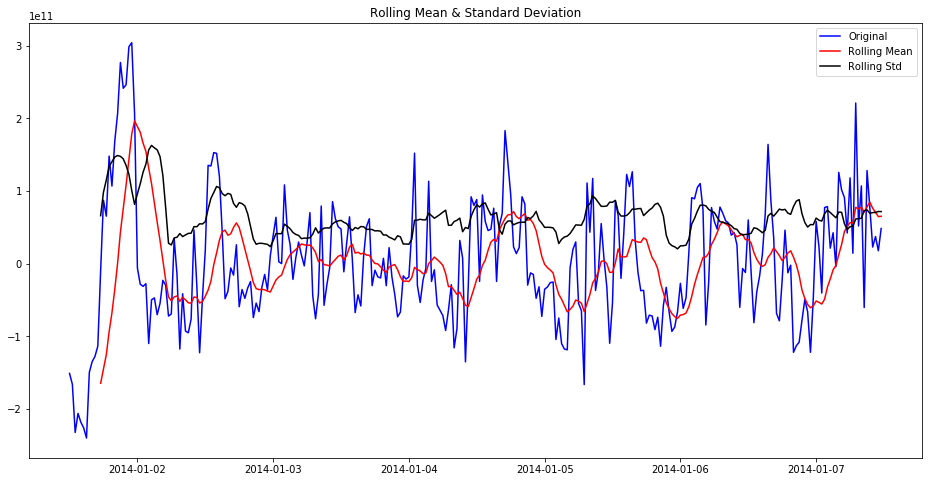

Results of Dickey-Fuller Test:
Test Statistic                  -5.263456
p-value                          0.000007
#Lags Used                       4.000000
Number of Observations Used    283.000000
Critical Value (1%)             -3.453670
Critical Value (5%)             -2.871808
Critical Value (10%)            -2.572241
dtype: float64


In [6]:
decomposition = seasonal_decompose(ts, freq=int(60*24/m)) # Trend removal + season decomposition

ts_trend = decomposition.trend
ts_seasonal = decomposition.seasonal
ts_residual = decomposition.resid


plt.figure(figsize=figsizeInA)
plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(ts_trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(ts_seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(ts_residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

ts_decompose = ts_residual
ts_decompose.dropna(inplace=True)


test_stationarity(ts_decompose, figsizeInA)


## ■ Data fitting (3): Hurst parameter


- Traffic aggregation at level $m$ is given by
$$ X_k^{(m)} = \frac{1}{m} \sum_{i=(k-1)m+1}^{km} X_i, \quad k=1,2,\ldots $$ 


- Self-similarity is related to correlation among distance samples:
    - Autocorrelation $\rho(X_k, X_{k+1})$ decays with $m$ slowly
    - Consequence: traffic is not Poisson anymore. Poisson is only when $H=0.5$;  


- Hurst parameter $0.5 \leq H\leq 1$:
    - Time series – traffic - smooths out slowly, meaning that bursts are more likely
    - Definition: 
    $$ X_{ak} \stackrel{d}{=} a^H X_k $$


- When and why:
    - Why: heavy tails if request arrival times;
    - When: at least $30$ independent users generating traffic requests




<p style="margin-bottom:2cm;"></p>
<div style="width:100%;text-align:right;font-weight:bold;font-size:1.2em;"> 22 </div>
<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

## ■ Data fitting (3): Hurst parameter

- There are several methods estimating Hurst parameter $H$


- Aggregated variance method: it holds 
$$ Var(X^{(m)}) \sim c m^{2(H-1)} $$


- Case: LAN traffic


- Results:


<img style="float: right; width: 500px; margin: 0px 20px 20px 0px;" src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/HurstLogLog.png">


<p style="margin-bottom:12cm;"></p>
<div style="width:100%;text-align:right;font-weight:bold;font-size:1.2em;"> 23 </div>
<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

## ■ Data fitting (3): Hurst parameter


- Traffic is differentiated by 𝑑=𝐻−0.5
- Results
    - $d=0.102$;
    - Results of
    differentiation - differentiated traffic, see bellow


<p style="margin-bottom:2cm;"></p>
<div style="width:100%;text-align:right;font-weight:bold;font-size:1.2em;"> 24 </div>
<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

H =  0.10211154764137315


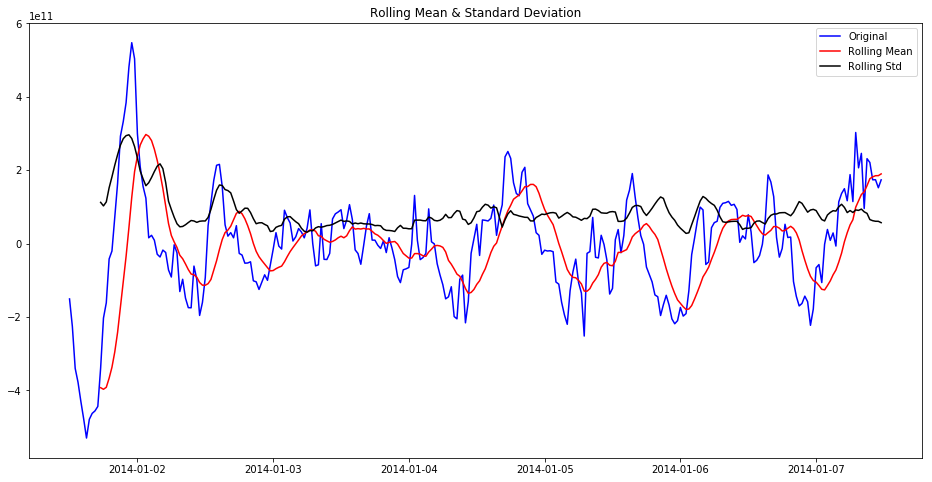

Results of Dickey-Fuller Test:
Test Statistic                -6.605360e+00
p-value                        6.577525e-09
#Lags Used                     8.000000e+00
Number of Observations Used    2.790000e+02
Critical Value (1%)           -3.454008e+00
Critical Value (5%)           -2.871956e+00
Critical Value (10%)          -2.572320e+00
dtype: float64


In [7]:
# Estimate Hurst parameter

H = hurst(ts_f) # We estimate from non-aggregated data
print ('H = ', H)

d = H - 0.5
ts_diff = pd.Series(fractionalDiff(ts_decompose, d), index = ts_decompose.index)

test_stationarity(ts_diff, figsizeInA)

## ■ Data fitting (4)

- first we analyse autocorrelation and partial autocorrelation fucntion



<p style="margin-bottom:2cm;"></p>
<div style="width:100%;text-align:right;font-weight:bold;font-size:1.2em;"> 25 </div>
<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

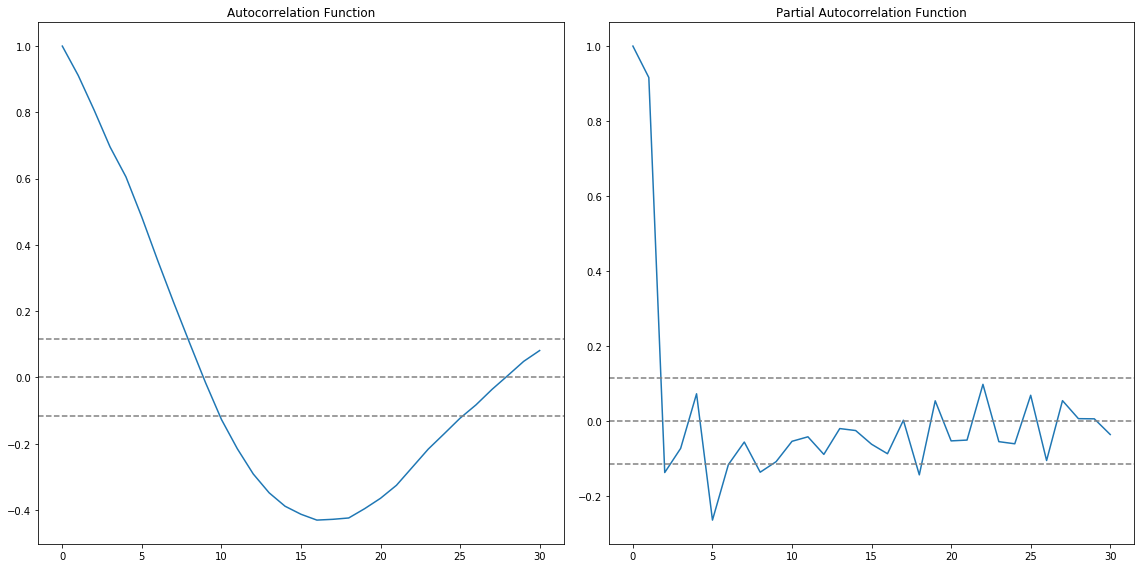

In [10]:
in_data = ts_diff
lag_acf = acf(in_data, nlags=30)
lag_pacf = pacf(in_data, nlags=30, method='ols')


plt.figure(figsize=figsizeInA)
#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(in_data)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(in_data)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')


#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(in_data)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(in_data)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

# We observe
p = 7
q = 3

## ■ Data fitting (4): AR part of the model


- We need to determine $p$ and $a_1, \ldots, a_p$


- Determining 𝑝: partial autocorrelation function and statistical hypothesis testing
    - partial autocorrelation function 
    - results: $p=7$



- Determining $a_1, \ldots, a_p$ <br>

<!--
$a_1=−0,3361$ <br>
$a_2=−0,0582$ <br>
$a_3=0,000006$ <br>
$a_4=−0,0042$ <br>
$a_5=−0,6068$ <br>
$a_6=0,2244$ <br>
-->

<!--
<img style="float: right; width: 300px; margin: 0px 20px 20px 0px;" src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/TimeSer_TSTrafficPartAutocorr.png">
-->


<p style="margin-bottom:2cm;"></p>
<div style="width:100%;text-align:right;font-weight:bold;font-size:1.2em;"> 26 </div>
<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

## ■ Data fitting (5): MA part of the model


- We need to determine $q$ and $b_1, \ldots, b_q$
    - Autocorrelation
    - Determining $q$: statistical hypothesis testing
    - Results: $q=3$


- Determining $b_1, \ldots, b_q$ <br>

<!--
$b_1=0,1729$, <br>
$b_2=0,141$, <br>
$b_3=0,1503$, <br>
$b_4=0,1409$, <br>
$b_5=−0,6923$. <br>
-->

<!--
<img style="float: right; width: 300px; margin: 0px 20px 20px 0px;" src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/TimeSer_Autocorr.png">
-->


<p style="margin-bottom:2cm;"></p>
<div style="width:100%;text-align:right;font-weight:bold;font-size:1.2em;"> 27 </div>
<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

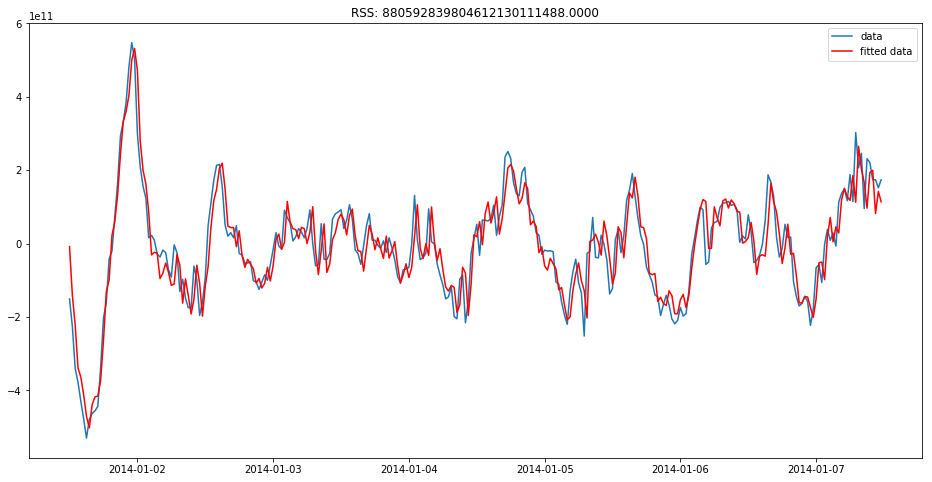

In [11]:
#ARIMA model:
p = 7
q = 3 
model = ARIMA(in_data, order=(p, 0, q))  
results_ARIMA = model.fit(disp=-1)

plt.figure(figsize=figsizeInA)
plt.plot(in_data, label="data")
plt.plot(results_ARIMA.fittedvalues, color='red', label="fitted data")
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-in_data)**2))
plt.legend(loc='best')
plt.show()

In [12]:
# Coefficients
# AR
print ('AR coefficients: ', results_ARIMA.arparams)
# MA
print ('MA coefficients: ', results_ARIMA.maparams)

AR coefficients:  [ 1.09865825 -0.47038267  0.94350736 -0.51280543 -0.14937406  0.19547859
 -0.22030221]
MA coefficients:  [-0.13059101  0.29336824 -0.90829668]


## ■ Predicting / estimating time series (1)



- Use a model 
$$ X_k = c_0 + \sum_{i=1}^p a_i X_{k-i} + \sum_{i=1}^q b_i \varepsilon_{k-i} + \varepsilon_k $$
on a differenced data without sessions and trends. 


- Algorithm:
    1. Estimate/compute $Y_k$ from past values $\hat{Y}_{k-1}$
    2. Use antidifference operator to compute $\hat{X}_k = \hat{Y}_k + \hat{Y}_{k-1}$
    3. Continue to estimate next values $\hat{X}_{k+n}$;


    

<p style="margin-bottom:2cm;"></p>
<div style="width:100%;text-align:right;font-weight:bold;font-size:1.2em;"> 28 </div>
<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

## ■ Predicting / estimating time series (2)


- Case:
    - The model is fitted on data samples $\{1,…,8000\}$
    - Predict next values for $8000$ on





<p style="margin-bottom:2cm;"></p>
<div style="width:100%;text-align:right;font-weight:bold;font-size:1.2em;"> 29 </div>
<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

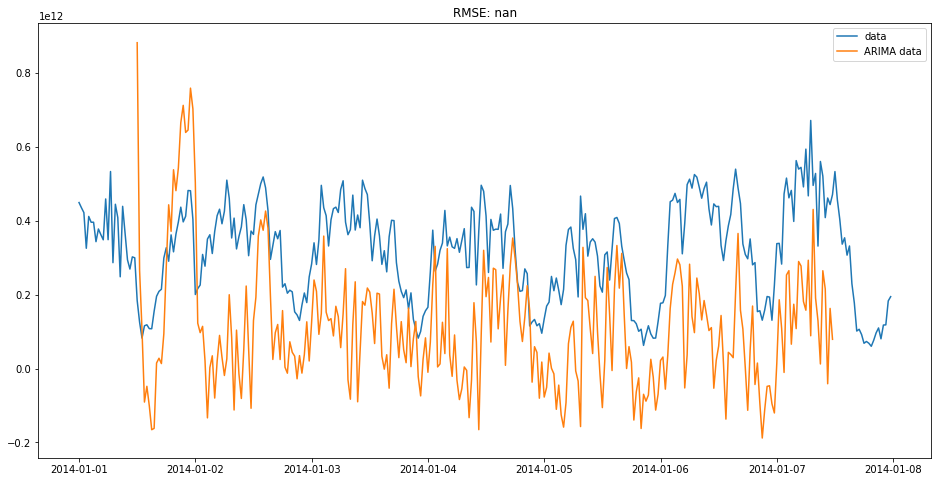

In [13]:
predictions_ARIMA_noBase_noSeason_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)


predictions_ARIMA_base = pd.Series(ts.ix[0], index=in_data.index) #create a series of all numbers equal to starting point
predictions_ARIMA_noSeasson_diff = predictions_ARIMA_base.add(predictions_ARIMA_noBase_noSeason_diff, fill_value=0) #add the differences to get the result
#predictions_ARIMA_noSeasson_diff.head()


#predictions_ARIMA_log = predictions_ARIMA_log.add(trend, fill_value=0)
#predictions_ARIMA_log = predictions_ARIMA_log.add(seasonal,fill_value=0)
predictions_ARIMA_noSeasson = pd.Series(fractionalInvDiff(predictions_ARIMA_noSeasson_diff, d), index=in_data.index) 
predictions_ARIMA_all = predictions_ARIMA_noSeasson.add(predictions_ARIMA_noSeasson, fill_value=0)



#predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.figure(figsize=figsizeInA)
plt.plot(ts, label="data")
plt.plot(predictions_ARIMA_all, label="ARIMA data")
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA_all-ts)**2)/len(ts)))
plt.legend(loc='best')
plt.show()

## ■ Traffic managing algorithms


- Traffic shaping (transmit excess traffic when possible)
    - Aim: QoS related performance parameters regulation such as delays, jitter, etc.
    - Algorithms: 
        - Queuing theory (RED, .... More in Queuing theory chapter)
        - Service managing: (DiffServ, ... More in Queuing theory chapter)


- Traffic policing (drop excess traffic):
    - Aim: measuring and managing traffic to assure QoS
    - Elements: 
        - Meter: measure traffic
        - Marker: label traffic
        - Dropper: drops excess traffic 



<p style="margin-bottom:2cm;"></p>
<div style="width:100%;text-align:right;font-weight:bold;font-size:1.2em;"> 30 </div>
<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

## ■ Conclusion


- Using time series we
    - Model, analyze and control TC traffic
    - Measure and control system status
    - Model user behavior
    
    
- Time series algorithms available: 
    - Select the model
    - Fit the model
    - Predict
    - Determine trends and seasons



<p style="margin-bottom:2cm;"></p>
<div style="width:100%;text-align:right;font-weight:bold;font-size:1.2em;"> 31 </div>
<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">